In [8]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
print 1

1


In [9]:
tweets_data_path = 'tweets.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        
        if 'text' not in tweet:
            continue
            
        tweets_data.append(tweet)
    except:
        continue

In [32]:
with open('t/tweets.json',"w") as archivo:
    for i in tweets_data:
        r = json.dumps(i)
        archivo.write(r)
        archivo.write("\n")

In [10]:
print len(tweets_data)


24740


In [11]:
tweets = pd.DataFrame()

In [15]:
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)

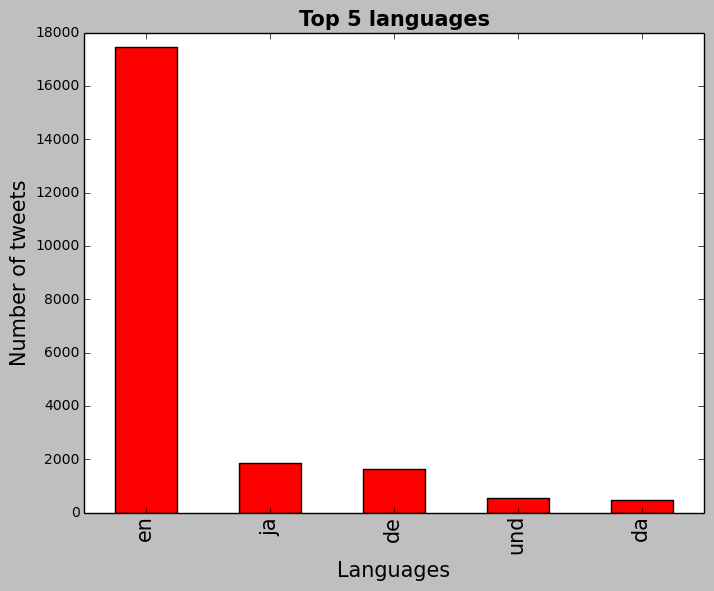

In [16]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

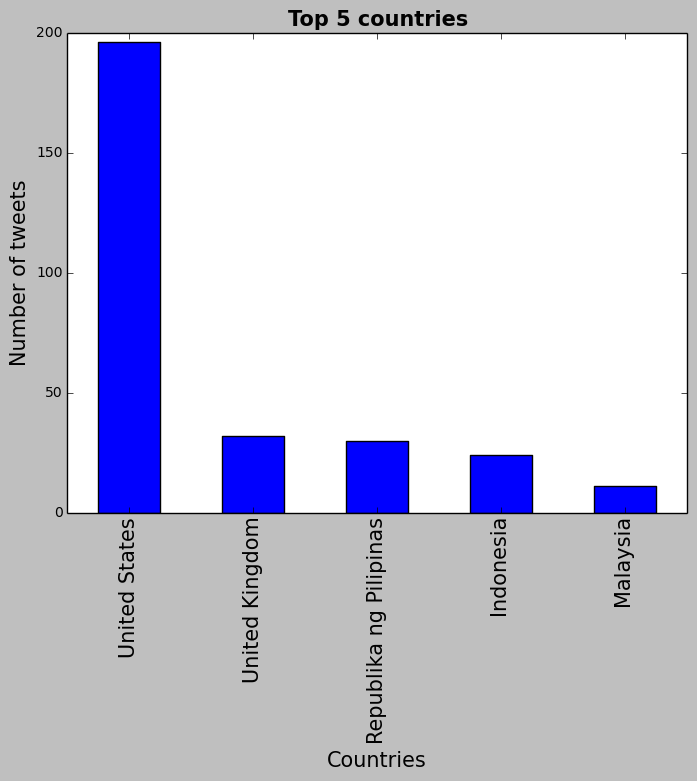

In [17]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

In [18]:
import re

In [19]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [20]:
tweets['python'] = tweets['text'].apply(lambda tweet: word_in_text('python', tweet))
tweets['spark'] = tweets['text'].apply(lambda tweet: word_in_text('spark', tweet))
tweets['hadoop'] = tweets['text'].apply(lambda tweet: word_in_text('hadoop', tweet))

In [21]:
print tweets['python'].value_counts()[True]
print tweets['spark'].value_counts()[True]
print tweets['hadoop'].value_counts()[True]

6625
14468
1992


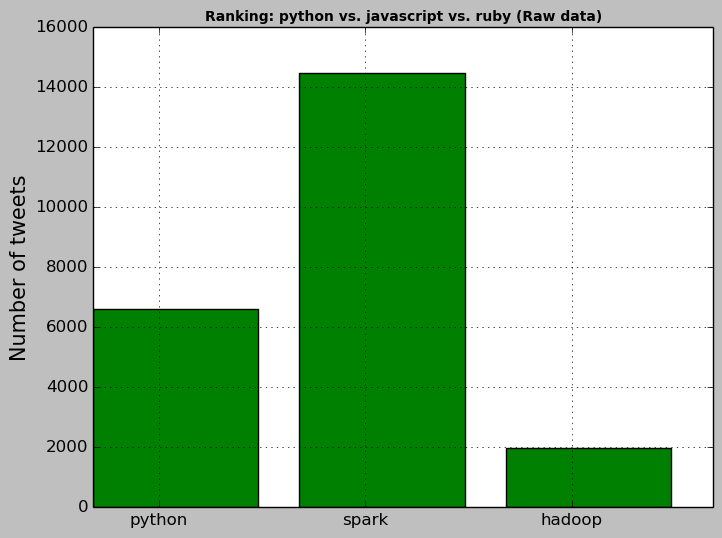

In [22]:
prg_langs = ['python', 'spark', 'hadoop']
tweets_by_prg_lang = [tweets['python'].value_counts()[True], tweets['spark'].value_counts()[True], tweets['hadoop'].value_counts()[True]]

x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: python vs. javascript vs. ruby (Raw data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()

In [23]:
tweets['programming'] = tweets['text'].apply(lambda tweet: word_in_text('programming', tweet))
tweets['tutorial'] = tweets['text'].apply(lambda tweet: word_in_text('tutorial', tweet))

In [24]:
tweets['relevant'] = tweets['text'].apply(lambda tweet: word_in_text('programming', tweet) or word_in_text('tutorial', tweet))

In [25]:
print tweets['programming'].value_counts()[True]
print tweets['tutorial'].value_counts()[True]
print tweets['relevant'].value_counts()[True]

193
53
241


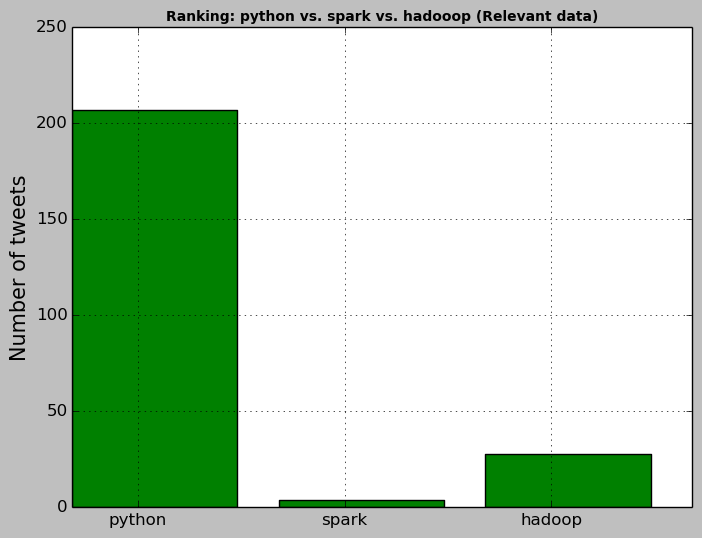

In [26]:
tweets_by_prg_lang = [tweets[tweets['relevant'] == True]['python'].value_counts()[True], 
                      tweets[tweets['relevant'] == True]['spark'].value_counts()[True], 
                      tweets[tweets['relevant'] == True]['hadoop'].value_counts()[True]]
x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width,alpha=1,color='g')
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: python vs. spark vs. hadooop (Relevant data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()

In [27]:
def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

In [28]:
tweets['link'] = tweets['text'].apply(lambda tweet: extract_link(tweet))

In [29]:
tweets_relevant = tweets[tweets['relevant'] == True]
tweets_relevant_with_link = tweets_relevant[tweets_relevant['link'] != '']

In [30]:
print tweets_relevant_with_link[tweets_relevant_with_link['python'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['spark'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['hadoop'] == True]['link']

195       http://t.co/xw750VkED2
366       http://t.co/LGmrBTYHBf
587       http://t.co/J8IZwPOk7i
666       http://t.co/C2u3J1DEtn
809       http://t.co/NQbEFumaPB
1011     https://t.co/eq7E4ZSJBv
1407      http://t.co/b9VindTrSU
1426      http://t.co/13zepASFMJ
1558      http://t.co/VfDSYy2JDN
1654      http://t.co/3XDCxqRt5e
2158      http://t.co/QuJyhFftAb
2329      http://t.co/JtiN8Wdrpx
3044     https://t.co/EqSCG3LoH2
3051      http://t.co/9YSQMS262F
3072      http://t.co/cKqXRhzMk3
3105      http://t.co/PrxVRuIjll
3493                    http://…
4301      http://t.co/XgI5dOyzCM
4302      http://t.co/XgI5dOyzCM
4359     https://t.co/2YUCrCBIaF
4417      http://t.co/30LCo1uYwD
4420      http://t.co/93RdqvGT1x
4421      http://t.co/93RdqvGT1x
4643     https://t.co/2YUCrCBIaF
4819      http://t.co/yo6SNAFeRN
4841      http://t.co/bsZIZxTJBr
4941      http://t.co/93RdqvGT1x
4947      http://t.co/8lOJujN8Zt
5001      http://t.co/72myVJaXg0
5181      http://t.co/J8IZwPOk7i
          